In [0]:
#Importing libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
# /255 : To have pixel values in same range
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
trainy_categorical = np_utils.to_categorical(y_train, 10)
testy_categorical = np_utils.to_categorical(y_test, 10)

In [16]:
print(np.shape(X_train))
print(np.shape(X_test))
# Dataset to have one channel
w, h, c = X_train.shape[1], X_train.shape[2], 1
X_train = X_train.reshape((X_train.shape[0], w, h, c))
X_test = X_test.reshape((X_test.shape[0], w, h, c))
print(np.shape(X_train))
print(np.shape(X_test))

#Mean and SD for Image Normalization
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
Statistics train=0.131 (0.308), test=0.133 (0.310)


In [0]:
#Image Normalization
from keras.preprocessing.image import ImageDataGenerator 

# Image generator - centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
valid_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

datagen.fit(X_train)
datagen.fit(X_test)

In [18]:
#L2 Regulatization
#Added Relu activation after batch normalization
from keras.layers import Activation
from keras.regularizers import l2
model = Sequential()
 
# Input image = 28x28 with 1 channel
# Convolved with 3x3 with 16 kernels
# Output image will be = 26x26 with 16 channels
model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01), input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

# Input image = 26x26 with 16 channels
# Convolved with 3x3 with 32 kernels
# Output image will be = 24x24 with 32 channels
model.add(Convolution2D(32, 3, 3,kernel_regularizer=l2(0.01))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.2))

# Input image = 24x24 with 32 channels
# Convolved with 1x1 with 10 kernels
# Output image will be = 22x22 with 10 channels
model.add(Convolution2D(10, 1, 1,kernel_regularizer=l2(0.01))) #22
model.add(Activation('relu'))

# -----------> Max Pooling <------------------
model.add(MaxPooling2D(pool_size=(2, 2)))#11

# Input image = 12x12 with 10 channels
# Convolved with 3x3 with 16 kernels
# Output image will be = 10x10 with 16 channels
model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

# Input image = 10x10 with 16 channels
# Convolved with 3x3 with 16 kernels
# Output image will be = 8x8 with 16 channels
model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

# Input image =8x8 with 16 channels
# Convolved with 3x3 with 16 kernels
# Output image will be = 6x6 with 16 channels
model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.2))

# Input image = 6x6 with 16 channels
# Convolved with 3x3 with 16 kernels
# Output image will be = 4x4 with 16 channels
model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

# Input image = 4x4 with 16 channels
# Convolved with 4x4 with 10 kernels
# Output image will be = 1x1 with 10 channels
model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
#model.add(Dropout(0.1))

# Last Layer
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 10)        330       
__________

In [19]:
#Checkpoint to save the model with best val accuracy
# Learning rate scheduler
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import *
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
filepath='./Assignemnt5.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max',  period=1)
model.fit_generator(datagen.flow(X_train, trainy_categorical, batch_size=512),
                    steps_per_epoch=len(X_train) / 512, 
                    epochs=40,validation_data=valid_datagen.flow(X_test, testy_categorical, batch_size=128),
                   callbacks=[LearningRateScheduler(scheduler, verbose=1),checkpoint],
                   validation_steps=64)


Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
118/117 [==============================] - 5s 44ms/step - loss: 1.1106 - acc: 0.9090 - val_loss: 2.5163 - val_acc: 0.0881

Epoch 00001: val_acc improved from -inf to 0.08813, saving model to ./Assignemnt5.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
118/117 [==============================] - 3s 27ms/step - loss: 0.3150 - acc: 0.9840 - val_loss: 2.3932 - val_acc: 0.0920

Epoch 00002: val_acc improved from 0.08813 to 0.09196, saving model to ./Assignemnt5.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
118/117 [==============================] - 3s 26ms/step - loss: 0.1896 - acc: 0.9867 - val_loss: 2.1949 - val_acc: 0.1764

Epoch 00003: val_acc improved from 0.09196 to 0.17636, saving model to ./Assignemnt5.hdf5
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
118/117 [=============================

In [20]:
#Getting the best model and working on that
from keras.models import load_model
from keras.optimizers import Adam
model = load_model('Assignemnt5.hdf5')
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
score = model.evaluate(X_test, testy_categorical, verbose=0)
print(score)

[0.1630799171566963, 0.9672]


In [0]:
#Predicting the values of the test data 
y_pred = model.predict(X_test)

In [22]:
print(y_pred[:10])
print(y_test[:10])

[[1.21411169e-03 8.19021021e-04 1.20440207e-03 3.04241985e-04
  6.13191165e-04 7.07692176e-04 1.38540316e-04 9.93388772e-01
  3.37282981e-04 1.27273065e-03]
 [1.24972332e-02 2.53250059e-02 9.35515046e-01 4.80561238e-03
  3.93022259e-04 2.13586236e-03 1.30128758e-02 2.41997209e-03
  2.71752430e-03 1.17778720e-03]
 [5.42951515e-04 9.88962710e-01 9.35702003e-04 3.86382046e-04
  5.84693626e-04 1.29569601e-03 1.09419168e-03 3.21909506e-03
  3.76349839e-04 2.60237954e-03]
 [9.93575871e-01 6.75066607e-04 1.09269575e-04 8.49569566e-04
  1.10433996e-03 4.32385976e-04 5.80387539e-04 1.45652192e-03
  1.05046958e-03 1.66201353e-04]
 [5.97841339e-03 3.36345881e-02 5.85054001e-03 4.16348176e-03
  9.24209297e-01 3.37429205e-03 4.78234934e-03 5.56205027e-03
  1.54606253e-03 1.08989105e-02]
 [7.41438009e-04 9.85143244e-01 1.06104033e-03 6.97104260e-04
  6.74561772e-04 1.20456051e-03 1.50464359e-03 5.76046715e-03
  5.56623912e-04 2.65635154e-03]
 [5.76946361e-04 1.44197885e-02 1.56674813e-03 1.55900361e

In [23]:
# Calculating maximum value's indices at every row
# Get the first 25 wrong predicted images here
PredictedValues = np.argmax(y_pred, axis=1)
print(np.shape(PredictedValues))
print(np.shape(y_test))
indices = list()
# getting all the samples for which model predicted wrongly
for i in range(10000):
  if(PredictedValues[i] != y_test[i]):
    indices.append(i)
  
# First 25 wrongly predicted image indices
print(indices[:25])

(10000,)
(10000,)
[11, 18, 33, 66, 78, 104, 115, 151, 160, 175, 193, 259, 318, 321, 325, 341, 359, 366, 421, 443, 445, 449, 450, 462, 464]


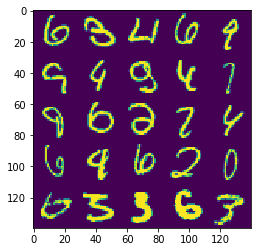

In [24]:
(X_train_load, y_train_load), (X_test_load, y_test_load) = mnist.load_data()
#Form the grid
output  = np.concatenate((X_test_load[indices[0]],X_test_load[indices[1]],X_test_load[indices[2]],X_test_load[indices[3]],X_test_load[indices[4]]),axis=1)
output1 = np.concatenate((X_test_load[indices[5]],X_test_load[indices[6]],X_test_load[indices[7]],X_test_load[indices[8]],X_test_load[indices[9]]),axis=1)
output2 = np.concatenate((X_test_load[indices[10]],X_test_load[indices[11]],X_test_load[indices[12]],X_test_load[indices[13]],X_test_load[indices[14]]),axis=1)
output3 = np.concatenate((X_test_load[indices[15]],X_test_load[indices[16]],X_test_load[indices[17]],X_test_load[indices[18]],X_test_load[indices[19]]),axis=1)
output4 = np.concatenate((X_test_load[indices[20]],X_test_load[indices[21]],X_test_load[indices[22]],X_test_load[indices[23]],X_test_load[indices[24]]),axis=1)
final_output = img = np.concatenate((output,output1,output2,output3,output4), axis=0)
from matplotlib import pyplot as plt
%matplotlib inline        
# Final matrix
plt.imshow(final_output)